### Estudo de Correlação: 
> Temperatura / Cobertura Vegetal

Este Jupyter Notebook faz parte do módulo de estudo de correlação do projeto PRECORSIA, e concentra-se na análise da correlação entre a temperatura e a cobertura vegetal.

In [17]:
# Importing GEE dependencies
from helpers.geeApi import PrecorsiaGee
import ee

# Importing image processing tools
from helpers.imageCorrelator import ImageCorrelator
from helpers.imageProcessor import ImageProcessor
import matplotlib.pyplot as plt

#### Image availability list

Add dataset's configuration 

In [18]:
gds_one = PrecorsiaGee('GOOGLE/DYNAMICWORLD/V1', [0.00788292, 0.22374485])
gds_two = PrecorsiaGee('JAXA/GCOM-C/L3/LAND/LST/V3', [10900, 16591])

In [19]:
# ! Execute only once per session
PrecorsiaGee.init()

Configure the filter and get the list of images

In [20]:
START = ee.Date('2020-01-01')
END = START.advance(1400, 'day')
geolocation = [16.0569, 51.6608]
round_factor = 8

In [21]:
gds_one_list = gds_one.list(geolocation, [START, END])
gds_two_list = gds_two.list(geolocation, [START, END])
gds_one_list, gds_two_list = PrecorsiaGee.correlate_dates(gds_one_list, gds_two_list, round_factor)

#### Image requests and data acquisition

commit to memory

In [22]:
for id in gds_one_list:
    gds_one_image = gds_one.image(id['id'], ['grass'], geolocation)
    plt.imsave(f'./buffer/%s.png' % id['id'], gds_one_image, cmap='gray')

In [23]:
for id in gds_two_list:
    gds_two_image = gds_two.image(id['id'], ['LST_AVE'], geolocation)
    plt.imsave(f'./buffer/%s.png' % id['id'], gds_two_image, cmap='gray')

#### Processing and visualizing the data

filter using zero counting

In [24]:
# ! will delete from buffer
process = ImageProcessor([gds_one_list, gds_two_list])
[gds_one_lz, gds_two_lz] = process.zero_counting_filter()

Group by date and plot a correlation graph

In [ ]:
corr_list = PrecorsiaGee.connected_correlation(gds_one_lz, gds_two_lz, round_factor)

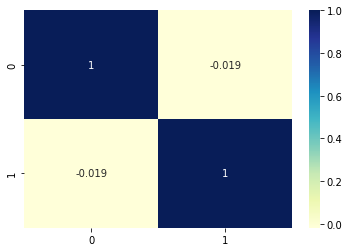

In [35]:
corr_study = ImageCorrelator(corr_list)
corr_avr = corr_study.calculate_correlation()
ImageCorrelator.plot(corr_avr)